In [ ]:
from google.colab import drive
drive.mount('/mydrive', force_remount=True)

Mounted at /mydrive


In [ ]:
!ls /mydrive


MyDrive  Shareddrives


In [ ]:
import pandas as pd

url = "https://drive.google.com/uc?id=1Ytw4rZqIVaMPcF_MHqAKFOqOuoSeE93o"
df = pd.read_csv(url)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [ ]:
df.head()

,StudyHours,Attendance,Resources,Extracurricular,Motivation,Internet,Gender,Age,LearningStyle,OnlineCourses,Discussions,AssignmentCompletion,ExamScore,EduTech,StressLevel,FinalGrade
0,19,64,1,0,0,1,0,19,2,8,1,59,40,0,1,3
1,19,64,1,0,0,1,0,23,3,16,0,90,66,0,1,2
2,19,64,1,0,0,1,0,28,1,19,0,67,99,1,1,0
3,19,64,1,1,0,1,0,19,2,8,1,59,40,0,1,3
4,19,64,1,1,0,1,0,23,3,16,0,90,66,0,1,2


In [ ]:
df.columns

Index(['StudyHours', 'Attendance', 'Resources', 'Extracurricular',
       'Motivation', 'Internet', 'Gender', 'Age', 'LearningStyle',
       'OnlineCourses', 'Discussions', 'AssignmentCompletion', 'ExamScore',
       'EduTech', 'StressLevel', 'FinalGrade'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14003 entries, 0 to 14002
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   StudyHours            14003 non-null  int64
 1   Attendance            14003 non-null  int64
 2   Resources             14003 non-null  int64
 3   Extracurricular       14003 non-null  int64
 4   Motivation            14003 non-null  int64
 5   Internet              14003 non-null  int64
 6   Gender                14003 non-null  int64
 7   Age                   14003 non-null  int64
 8   LearningStyle         14003 non-null  int64
 9   OnlineCourses         14003 non-null  int64
 10  Discussions           14003 non-null  int64
 11  AssignmentCompletion  14003 non-null  int64
 12  ExamScore             14003 non-null  int64
 13  EduTech               14003 non-null  int64
 14  StressLevel           14003 non-null  int64
 15  FinalGrade            14003 non-null  int64
dtypes: i

In [ ]:
df.duplicated().sum()

np.int64(1534)

In [ ]:
df.isna().sum()

,0
StudyHours,0
Attendance,0
Resources,0
Extracurricular,0
Motivation,0
Internet,0
Gender,0
Age,0
LearningStyle,0
OnlineCourses,0


**There is not null values**

In [ ]:
X = df.drop('FinalGrade', axis=1)
y = df['FinalGrade']

In [ ]:
df.dtypes

,0
StudyHours,int64
Attendance,int64
Resources,int64
Extracurricular,int64
Motivation,int64
Internet,int64
Gender,int64
Age,int64
LearningStyle,int64
OnlineCourses,int64


## Check FinalGrade distribution

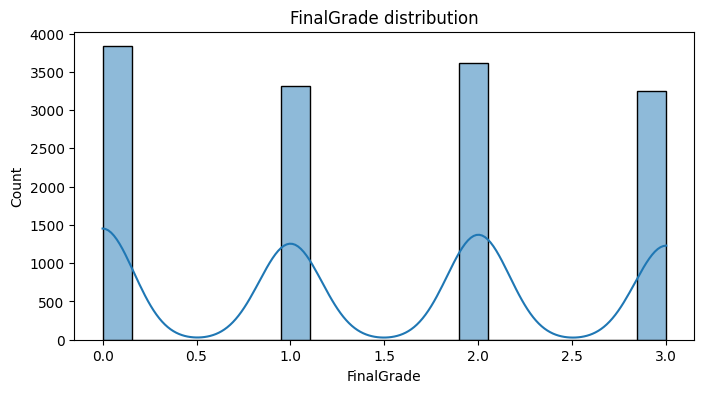

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(df['FinalGrade'], kde=True)
plt.title('FinalGrade distribution')
plt.show()

**convert numerical values with type object to numeric**

In [ ]:
for col in X.columns:
    if X[col].dtype == 'object':
        try:
            X[col] = pd.to_numeric(X[col])
            print(f"{col} converted to numeric")
        except:
            pass

In [ ]:
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

## Treat numerical columns with <=10 unique values as categorical

In [ ]:
for col in numerical_features.copy():
    if X[col].nunique() <= 10:
        numerical_features.remove(col)
        categorical_features.append(col)


In [ ]:
print(f"Initial numerical features ({len(numerical_features)}): {numerical_features}")
print(f"Initial categorical features ({len(categorical_features)}): {categorical_features}")

Initial numerical features (6): ['StudyHours', 'Attendance', 'Age', 'OnlineCourses', 'AssignmentCompletion', 'ExamScore']
Initial categorical features (9): ['Resources', 'Extracurricular', 'Motivation', 'Internet', 'Gender', 'LearningStyle', 'Discussions', 'EduTech', 'StressLevel']


**To fill missing values**

In [ ]:
num_imputer = SimpleImputer(strategy='median')
X[numerical_features] = num_imputer.fit_transform(X[numerical_features])

In [ ]:
cat_imputer = SimpleImputer(strategy='most_frequent')
X[categorical_features] = cat_imputer.fit_transform(X[categorical_features])

**Outlier Detection**

In [ ]:
outliers_index = set()
for col in numerical_features:
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = X[(X[col] < lower_bound) | (X[col] > upper_bound)].index
    outliers_index.update(outliers)
print(f"Total outliers detected: {len(outliers_index)}")

Total outliers detected: 45


**Drop outliers**

In [ ]:
X = X.drop(outliers_index)
y = y.drop(outliers_index)

**Scaling Numerical features to prevent bias**

In [ ]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X[numerical_features]), columns=numerical_features)

**OneHot encoding for Categorical**

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse_output=False)  # بدل sparse
X_encoded = pd.DataFrame(
    encoder.fit_transform(X[categorical_features]),
    columns=encoder.get_feature_names_out(categorical_features)
)


In [ ]:
X_processed = pd.concat([X_scaled, X_encoded], axis=1)

print(f"\nProcessed dataset shape: {X_processed.shape}")
print(X_processed.head())


Processed dataset shape: (13958, 20)
   StudyHours  Attendance       Age  OnlineCourses  AssignmentCompletion  \
0   -0.159817   -1.410246 -1.289887      -0.309126             -1.059344   
1   -0.159817   -1.410246 -0.151585       0.999623              1.059540   
2   -0.159817   -1.410246  1.271293       1.490405             -0.512535   
3   -0.159817   -1.410246 -1.289887      -0.309126             -1.059344   
4   -0.159817   -1.410246 -0.151585       0.999623              1.059540   

   ExamScore  Resources_1  Resources_2  Extracurricular_1  Motivation_1  \
0  -1.715925          1.0          0.0                0.0           0.0   
1  -0.245699          1.0          0.0                0.0           0.0   
2   1.620357          1.0          0.0                0.0           0.0   
3  -1.715925          1.0          0.0                1.0           0.0   
4  -0.245699          1.0          0.0                1.0           0.0   

   Motivation_2  Internet_1  Gender_1  LearningStyle_1

In [ ]:

correlation_matrix = X_processed.corr().abs()


In [ ]:
high_corr = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if correlation_matrix.iloc[i, j] > 0.8:
            colname = correlation_matrix.columns[i]
            high_corr.add(colname)

print(f"Highly correlated features (>0.8) to consider removing: {high_corr}")


Highly correlated features (>0.8) to consider removing: set()


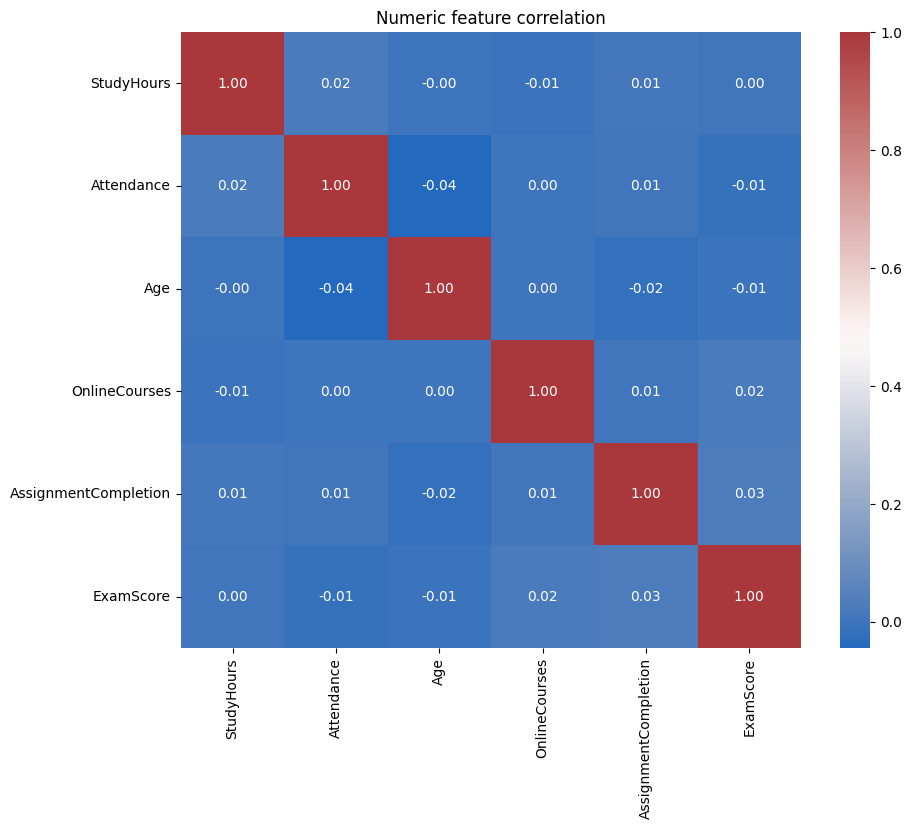

In [ ]:
# Correlation heatmap (numeric only) and highly correlated feature removal
plt.figure(figsize=(10,8))
num_corr = X[numerical_features].corr()
sns.heatmap(num_corr, annot=True, fmt='.2f', cmap='vlag')
plt.title('Numeric feature correlation')
plt.show()

**Great...There is not columns who are correlated more thean 0.8 So, we cannot drop any cols...This step I made as multicollinearity affect linear regression and logistic regression**

In [ ]:
X_selected = X_processed.drop(columns=high_corr)
print(f"Shape before: {X_processed.shape}, after removing correlated: {X_selected.shape}")


Shape before: (13958, 20), after removing correlated: (13958, 20)


**Our data is ready to pushed in Model but Firstly we should split the data 80% for training and 20% for testing**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Linear Regression Model**

**Build and Train Linear Regression Model**

In [ ]:
from sklearn.linear_model import LinearRegression


lr_model = LinearRegression()


lr_model.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = lr_model.predict(X_test)


**Model Evaluation**

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression Performance:")
print(f"  Mean Squared Error (MSE): {mse:.3f}")
print(f"  Mean Absolute Error (MAE): {mae:.3f}")
print(f"  R^2 Score: {r2:.3f}")


Linear Regression Performance:
  Mean Squared Error (MSE): 0.078
  Mean Absolute Error (MAE): 0.238
  R^2 Score: 0.938


**Comparasion between Training Performance and Testing Performance**

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Training performance
y_train_pred = lr_model.predict(X_train)
print("Train MSE:", mean_squared_error(y_train, y_train_pred))
print("Train MAE:", mean_absolute_error(y_train, y_train_pred))
print("Train R²:", r2_score(y_train, y_train_pred))

Train MSE: 0.077821531547016
Train MAE: 0.2388647991628794
Train R²: 0.9380701138219366


**Test performance**

In [ ]:
y_test_pred = lr_model.predict(X_test)
print("Test MSE:", mean_squared_error(y_test, y_test_pred))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))
print("Test R²:", r2_score(y_test, y_test_pred))

Test MSE: 0.0783123348154355
Test MAE: 0.23814309180693244
Test R²: 0.9378350960782145


In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report) # Error in both LR and SVM


ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

** we cannot make classification report on linear reg. so we will put threshold as 0.5 **

In [ ]:

y_pred_class = (y_pred >= 0.5).astype(int)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_class))


              precision    recall  f1-score   support

           0       1.00      0.92      0.96       753
           1       0.30      1.00      0.46       636
           2       0.00      0.00      0.00       745
           3       0.00      0.00      0.00       658

    accuracy                           0.47      2792
   macro avg       0.33      0.48      0.36      2792
weighted avg       0.34      0.47      0.36      2792



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## SVM Regression

##### SVM is used because it handles nonlinear patterns well, works effectively on small to medium datasets, and provides strong performance by maximizing the margin, making predictions more accurate and less sensitive to noise.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### 'rbf' is used because it can capture complex nonlinear relationships in the data without needing to specify a specific pattern, making it the most flexible and effective default kernel for regression.

In [ ]:
from sklearn.svm import SVR

svm_model = SVR(kernel='rbf')
svm_model.fit(X_train, y_train)

SVR()

In [ ]:
svm_pred = svm_model.predict(X_test)

print("\nSVM Regression Performance: ")
print("MSE:", mean_squared_error(y_test, svm_pred))
print("MAE:", mean_absolute_error(y_test, svm_pred))
print("R²:", r2_score(y_test, svm_pred))



SVM Regression Performance: 
MSE: 0.07130132850943147
MAE: 0.22359371388499658
R²: 0.943400484141729


## Convert SVM regression output to binary class (0/1)

In [ ]:
svm_pred_class = (svm_pred >= 0.5).astype(int)

from sklearn.metrics import classification_report
print("\nSVM Classification Report (threshold = 0.5):")
print(classification_report(y_test, svm_pred_class))



SVM Classification Report (threshold = 0.5):
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       753
           1       0.31      1.00      0.47       636
           2       0.00      0.00      0.00       745
           3       0.00      0.00      0.00       658

    accuracy                           0.49      2792
   macro avg       0.33      0.49      0.36      2792
weighted avg       0.34      0.49      0.37      2792



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Decision Tree (Regression)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(max_depth=5, min_samples_leaf=5, random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=5, min_samples_leaf=5, random_state=42)

In [ ]:
dt_pred = dt_model.predict(X_test)

print("\nDecision Tree Regression Performance: ")
print("MSE:", mean_squared_error(y_test, dt_pred))
print("MAE:", mean_absolute_error(y_test, dt_pred))
print("R²:", r2_score(y_test, dt_pred))


Decision Tree Regression Performance: 
MSE: 0.0
MAE: 0.0
R²: 1.0


In [ ]:
dt_pred_class = (dt_pred >= 0.5).astype(int)

print("\nDecision Tree Classification Report:")
print(classification_report(y_test, dt_pred_class))


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       753
           1       0.31      1.00      0.48       636
           2       0.00      0.00      0.00       745
           3       0.00      0.00      0.00       658

    accuracy                           0.50      2792
   macro avg       0.33      0.50      0.37      2792
weighted avg       0.34      0.50      0.38      2792



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Check for overfitting in Decision Tree.

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predictions on training set
dt_train_pred = dt_model.predict(X_train)

# Metrics on training set
train_mse = mean_squared_error(y_train, dt_train_pred)
train_mae = mean_absolute_error(y_train, dt_train_pred)
train_r2  = r2_score(y_train, dt_train_pred)

# Metrics on test set
test_mse = mean_squared_error(y_test, dt_pred)
test_mae = mean_absolute_error(y_test, dt_pred)
test_r2  = r2_score(y_test, dt_pred)

print("Decision Tree Performance:")
print(f"Train MSE: {train_mse:.3f}\t\tMAE: {train_mae:.3f}\t\tR²: {train_r2:.3f}")
print(f"Test  MSE: {test_mse:.3f}\t\tMAE: {test_mae:.3f}\t\tR²: {test_r2:.3f}")

# Simple check
if train_r2 - test_r2 > 0.2:  # threshold can be adjusted
    print("Overfitting")
else:
    print("Generalized")


Decision Tree Performance:
Train MSE: 0.000		MAE: 0.000		R²: 1.000
Test  MSE: 0.000		MAE: 0.000		R²: 1.000
Generalized


## The possible reason fo this not being overfitting are:


1.   By default, DecisionTreeRegressor can grow until all leaves are pure, i.e., it will perfectly memorize the training set if max_depth is None.
2.   If FinalGrade only has a few unique values, the Decision Tree can memorize the training set. Then, when you split data randomly, the test set may contain the same exact rows, giving perfect predictions.





In [ ]:
print("Unique y values:", y_train.nunique())

Unique y values: 4


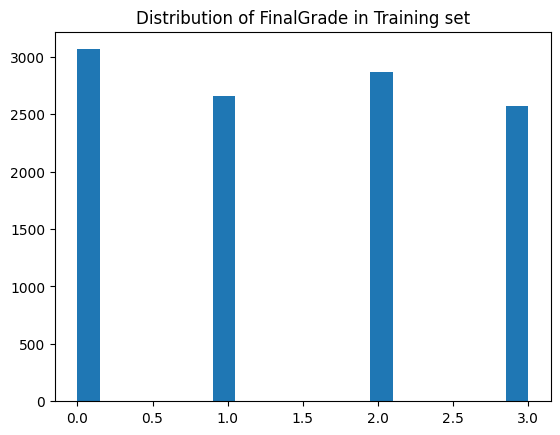

In [ ]:
import matplotlib.pyplot as plt
plt.hist(y_train, bins=20)
plt.title("Distribution of FinalGrade in Training set")
plt.show()


# Models Comparison

In [ ]:
print("\nFINAL COMPARISON: ")
print("Model\t\tMSE\t\tMAE\t\tR2")
print(f"LinearReg\t{mean_squared_error(y_test, y_pred):.3f}\t\t{mean_absolute_error(y_test, y_pred):.3f}\t\t{r2_score(y_test, y_pred):.3f}")
print(f"SVM\t\t{mean_squared_error(y_test, svm_pred):.3f}\t\t{mean_absolute_error(y_test, svm_pred):.3f}\t\t{r2_score(y_test, svm_pred):.3f}")
print(f"DecisionTree\t{mean_squared_error(y_test, dt_pred):.3f}\t\t{mean_absolute_error(y_test, dt_pred):.3f}\t\t{r2_score(y_test, dt_pred):.3f}")



FINAL COMPARISON: 
Model		MSE		MAE		R2
LinearReg	0.078		0.238		0.938
SVM		0.071		0.224		0.943
DecisionTree	0.000		0.000		1.000


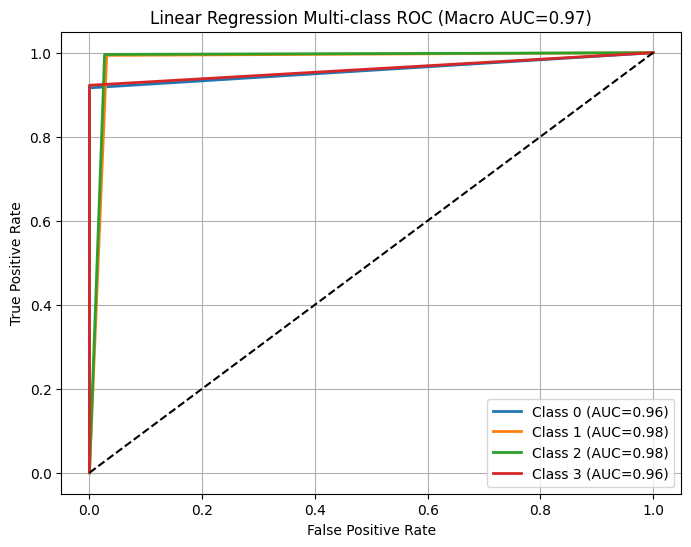

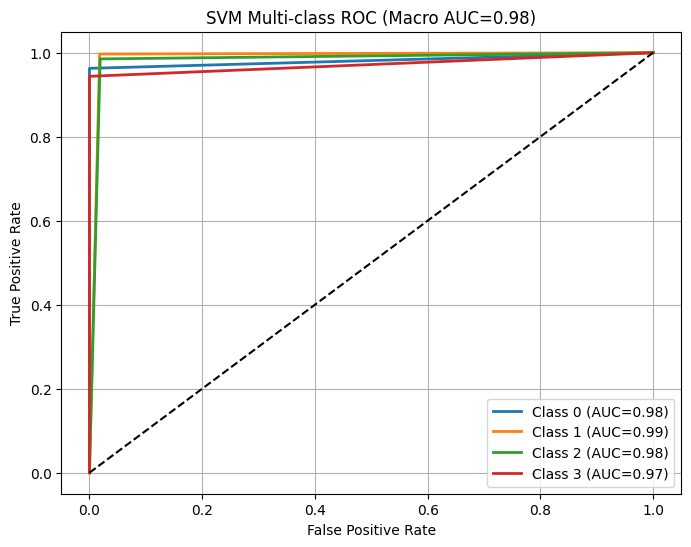

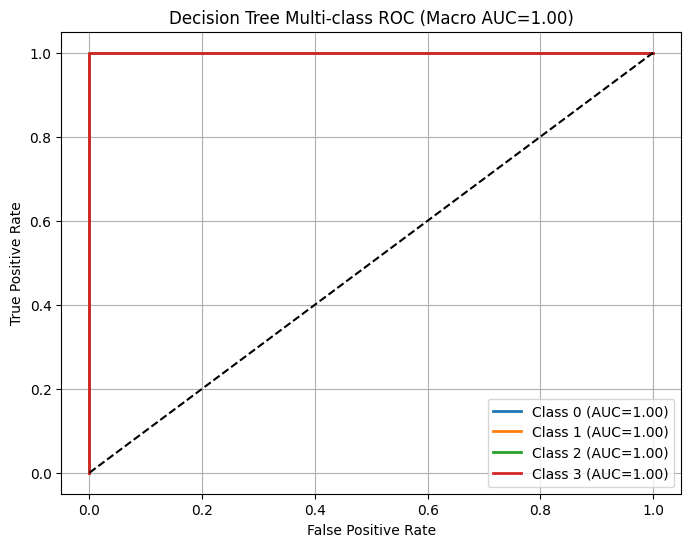


Macro-AUC Comparison:
Linear Regression: 0.971
SVM: 0.981
Decision Tree: 1.000


In [ ]:
# ===========================================================
# MULTI-CLASS ROC–AUC FOR ALL MODELS
# ===========================================================

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Binarize the target for multi-class
classes = sorted(y.unique())
y_test_bin = label_binarize(y_test, classes=classes)

# Predictions (round regression outputs to nearest class)
lr_pred_bin  = label_binarize(np.round(y_pred), classes=classes)
svm_pred_bin = label_binarize(np.round(svm_pred), classes=classes)
dt_pred_bin  = label_binarize(np.round(dt_pred), classes=classes)

# Function to compute ROC curves per class and macro-AUC
def plot_multiclass_roc(y_true_bin, y_pred_scores, model_name):
    n_classes = y_true_bin.shape[1]
    fpr = dict(); tpr = dict(); roc_auc = dict()

    plt.figure(figsize=(8,6))

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_scores[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], lw=2,
                 label=f'Class {classes[i]} (AUC={roc_auc[i]:.2f})')

    # Macro-average AUC
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= n_classes
    macro_auc = auc(all_fpr, mean_tpr)

    plt.plot([0,1], [0,1], 'k--')
    plt.title(f'{model_name} Multi-class ROC (Macro AUC={macro_auc:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

    return macro_auc

# Compute ROC–AUC for each model
auc_lr  = plot_multiclass_roc(y_test_bin, lr_pred_bin, 'Linear Regression')
auc_svm = plot_multiclass_roc(y_test_bin, svm_pred_bin, 'SVM')
auc_dt  = plot_multiclass_roc(y_test_bin, dt_pred_bin, 'Decision Tree')

# Compare macro-AUC
print("\nMacro-AUC Comparison:")
print(f"Linear Regression: {auc_lr:.3f}")
print(f"SVM: {auc_svm:.3f}")
print(f"Decision Tree: {auc_dt:.3f}")

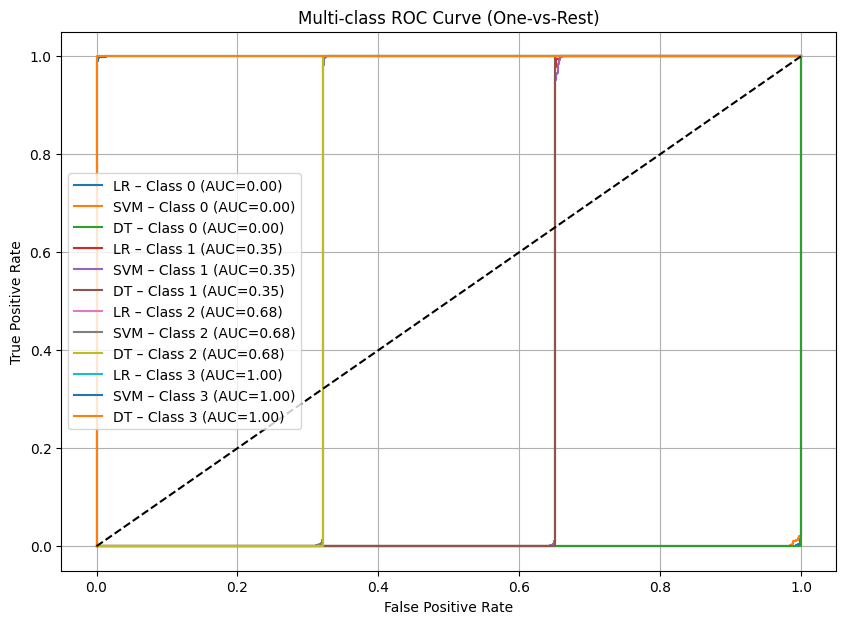

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize y_test for multiclass ROC
classes = sorted(y_test.unique())
y_test_bin = label_binarize(y_test, classes=classes)

# Prepare prediction scores (regression outputs)
lr_scores = lr_model.predict(X_test)
svm_scores = svm_pred
dt_scores = dt_pred

# Binarize predictions (needed for multi-class ROC)
lr_bin = label_binarize(lr_scores.round(), classes=classes)
svm_bin = label_binarize(svm_scores.round(), classes=classes)
dt_bin = label_binarize(dt_scores.round(), classes=classes)

plt.figure(figsize=(10, 7))

for i, cls in enumerate(classes):
    fpr_lr, tpr_lr, _ = roc_curve(y_test_bin[:, i], lr_scores)
    fpr_svm, tpr_svm, _ = roc_curve(y_test_bin[:, i], svm_scores)
    fpr_dt, tpr_dt, _ = roc_curve(y_test_bin[:, i], dt_scores)

    auc_lr = auc(fpr_lr, tpr_lr)
    auc_svm = auc(fpr_svm, tpr_svm)
    auc_dt = auc(fpr_dt, tpr_dt)

    plt.plot(fpr_lr, tpr_lr, label=f"LR – Class {cls} (AUC={auc_lr:.2f})")
    plt.plot(fpr_svm, tpr_svm, label=f"SVM – Class {cls} (AUC={auc_svm:.2f})")
    plt.plot(fpr_dt, tpr_dt, label=f"DT – Class {cls} (AUC={auc_dt:.2f})")

plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multi-class ROC Curve (One-vs-Rest)")
plt.legend()
plt.grid()
plt.show()


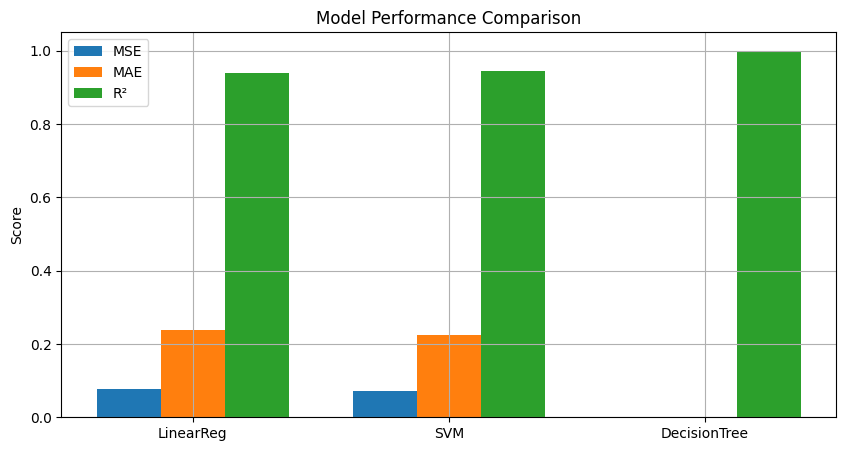

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

models = ["LinearReg", "SVM", "DecisionTree"]
mse_values = [
    mean_squared_error(y_test, y_pred),
    mean_squared_error(y_test, svm_pred),
    mean_squared_error(y_test, dt_pred)
]
mae_values = [
    mean_absolute_error(y_test, y_pred),
    mean_absolute_error(y_test, svm_pred),
    mean_absolute_error(y_test, dt_pred)
]
r2_values = [
    r2_score(y_test, y_pred),
    r2_score(y_test, svm_pred),
    r2_score(y_test, dt_pred)
]

x = np.arange(len(models))
plt.figure(figsize=(10,5))
plt.bar(x-0.25, mse_values, width=0.25, label="MSE")
plt.bar(x, mae_values, width=0.25, label="MAE")
plt.bar(x+0.25, r2_values, width=0.25, label="R²")

plt.xticks(x, models)
plt.ylabel("Score")
plt.title("Model Performance Comparison")
plt.legend()
plt.grid()
plt.show()
